In [1]:
from PIL import Image, ImageEnhance
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
from simple_ascii_art import img2ascii_arr, img2ascii_arr_v2
from img_processing import quantize

In [2]:
ascii_palette = [' ', '.', ':', ';', '~', '+', 'Y', 's', '3', 'V', '4', 'A', 'H', '#', 'N', '@']

In [3]:
orig_img = Image.open("imgs/storm-640-480.jpg").convert("RGB")

print(orig_img.size)

(640, 480)


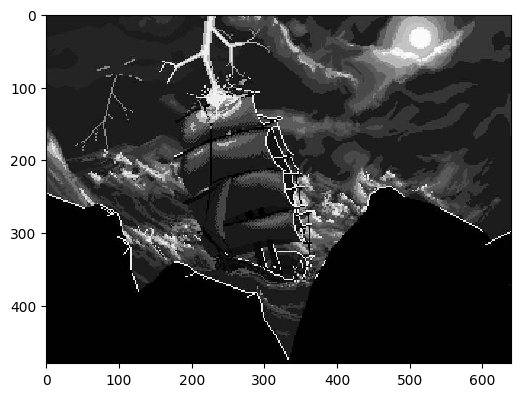

In [4]:
anim_img = orig_img.convert("L")
fig = plt.figure(figsize=(6,6))
im = plt.imshow(orig_img, cmap='gray', vmin=0, vmax=255, interpolation='none')

def resizeing_anim(frame):
    im.set_array(anim_img.resize((orig_img.size[0]//frame,orig_img.size[1]//frame), resample=Image.Resampling.BOX))

anim = FuncAnimation(fig=fig, func=resizeing_anim, frames=range(1,10), interval=300)
HTML(anim.to_jshtml())

0 229
(96, 128)
159


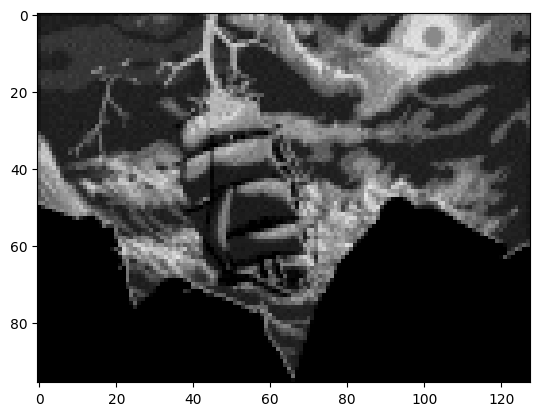

In [5]:
scale_factor = 0.2
contrast_enhancement = 1.7
brightness_enhancement = 1.4
quantize_colors = 16
proc_img = orig_img
proc_img = quantize(proc_img, quantize_colors).convert("L")
proc_img = proc_img.resize((int(orig_img.size[0] * scale_factor), int(orig_img.size[1] * scale_factor)), resample=Image.Resampling.BOX)
proc_img = ImageEnhance.Brightness(proc_img).enhance(brightness_enhancement)
proc_img = ImageEnhance.Contrast(proc_img).enhance(contrast_enhancement)

proc_img_arr = np.array(proc_img)
print(proc_img_arr.min(), proc_img_arr.max())
print(proc_img_arr.shape)
print(proc_img.histogram().count(0))
plt.imshow(proc_img_arr, cmap='gray', vmin=0, vmax=255, interpolation='none')

In [6]:
ascii_arr = img2ascii_arr(ascii_palette, proc_img_arr)

In [7]:
for i in range(len(ascii_arr)):
    for j in range(len(ascii_arr[i])):
        print(ascii_arr[i][j],ascii_arr[i][j], sep='', end='')
    print('\n', end='')

  ....  ......................  ........  ::....::::..::::~~~~~~~~~~~~::::::........::~~33AA44....~~++YYYYVVVVAAssAAHHss~~YYYY;;..............  ;;::................  ..;;~~++;;~~;;~~;;~~::::ssVVAAHHHHHHHHHHHHHHHHAAVV4433ss33++~~;;::::::;;;;~~;;~~~~~~~~~~;;
..::..::..::....::..::......::......::::::;;::;;::;;;;~~~~;;++++YY++~~~~;;;;::::..::::::ssAA33::;;YYssVV33VVVVAA33VV4433ssVV33VV::....::~~::..::++~~::....::..::..::::++++YY++++++++++::::::~~4444HH######NN##NN##NN##HH44VV33VVss++~~~~~~++YYYY++++++YY++++++~~
......::..::......::......::::..::::..::;;;;;;;;;;;;YY~~;;;;~~~~++~~;;;;::;;..::::::..YYHHHHss..::~~YYVV333333VV33VV33333333VVAAss~~~~YY33YY~~~~++YY;;..::..::::::;;++++++++YY++++~~::::..~~VVAA44####HH####NN##NN##NNHHAA44VVVV33++YY~~YY33YYYY++++++++ss~~YY++
....::::....::::..::::::::::::::::;;;;::..::;;;;;;;;++;;::;;;;;;;;;;::;;::::......::::YYAAAA33::..::;;~~ssss3333333333VVYY33VVVV44HHYY33VV33VVYYYY++++~~::::....::++++YY~~;;++++++::::::..ssVV44AA##HH####NNHHHH##NN##NNHH44VV33VVYY+

In [8]:
ascii_palette_v2 = [[' ', '.', ',', '_', '_', '_', '_', '_', '_', '_'],
        [' ', ':', ';', ';', ';', ';', ';', ';', ';', ';'],
        ['`', '-', '~', '~', 'v', 'x', 'x', 'y', 'a', 'a'],
        ["'", '!', '<', '\\', 'c', 'o', 'u', 'p', 'p', 'p'],
        ["'", '!', '+', '=', 'J', 'k', 'm', 'q', 'q', 'g'],
        ['"', '*', '?', '(', '[', 'A', 'm', 'G', '&', '&'],
        ['^', '*', 'T', 'f', 'S', '6', 'O', 'Q', 'Q', 'Q'],
        ['^', '*', '7', '7', 'P', '#', 'K', 'W', '@', '@'],
        ['^', '*', '7', 'M', '5', '#', 'R', '@', '@', '@'],
        ['^', '*', '7', 'M', '5', '#', 'N', '$', '$', '$']]


In [9]:
ascii_arr = img2ascii_arr_v2(ascii_palette_v2, proc_img_arr)

In [10]:
for i in range(len(ascii_arr)):
    for j in range(len(ascii_arr[i])):
        print(ascii_arr[i][j], sep='', end='')
    print('\n', end='')

 ....................:.,:;;;;~~~~~~;;;:...:-[W6::~cko6AWkOKkvokx....,...~;.........;~~\~\~~-!:;mmQ@@@@@@@@QQOAkAc~~;;;;~~~\~~~\~
 ::::::::::::::::;;:::~;;~\~-~~~!~-~:-:::::=W@k::!<?[[AAAAAA[A6#mpvoAkxvc\~;:::::~\\<<\\\-:::vAOQ@@@@@@@@@@@WOOAA\\xkA\c\\\\=\\\
 ::::::;:~-~~;;~~~~;::::-:-:-:~~;-:::::;;;~mWO#G\;;;:!!!+k[=cA[AA@m=[SO(<\\c\~~;~oJ\;:!-:::;oOOm@@@@R6AA6K@@@WOmG&QAA[\c\\\<<!\\
::~~;;~-;;~~-~~~;-~-~~::;:;:::::::::;;;;~~-OQO:*#p\-;;;;xJ-!\\(AkO@o~!-:;\=\\JkkkmJ\<:::::;c6QO@@@@@mAAAAm@@@QQO@@A[\J\\=c\::::`
:~-~:---;~:-;~~;-~;-;~~~-~~-;-~;;;-~~~~-~;~WW=;::?KR77!---!+vk\kAA6@&yc;;\=cc(==([A6Aox;xq&QQQQ@@@@@@QGGQ@@#KW@@R[=\\\=\\\\::;;;
 ::-::::--~~~-;:-~~;~~:-~;~~~-~~~~:::::~xyOQW\~:~:Am-::::::::!~=[AAAPQ&mkokAA[=\\\\J\okOWW@@@@@QQQK#KR@@@@Q@@@R6J\\c\\\\\\\~\\=~
 ::::::::;-~~~:~~~-;;;xJ-:::::--c;;;;;uS*!-6Wm::::AO::::::::::::!+=\[SR@@QmkccJc\kJ[A#66m6KR@@@@@@@@@@@@Q@@@mOm(\<!<<<<!---!!<! 
.:;;::;:~;;~;~xv(<-~~~~;:;;;:-;v+~<6f+~;:::-WQ~~:<!Sv::::::::::.::!<\\=A6@A#AGQmc[kkkJAAmA6QOKKK@